**TP1**
TREMONT-RAIMI Julien
Ethan TOMASO

Partie 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Charge le fichier CSV
df = pd.read_csv("winequality.csv")
#affiche les 5 premières lignes pour avoir un aperçu des données.
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [17]:
#Compte le nombre de valeurs manquantes (NaN) dans chaque colonne pour identifier les problèmes de qualité des données.
print(df.isnull().sum())


fixed acidity           73
volatile acidity        94
citric acid             79
residual sugar          79
chlorides               62
free sulfur dioxide     69
total sulfur dioxide    76
density                 84
pH                      94
sulphates               97
alcohol                 64
quality                 83
dtype: int64


In [18]:
#Remplace les valeurs manquantes par la moyenne de chaque colonne, puis vérifie que toutes les valeurs ont été traitées.
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [19]:
#Affiche les statistiques résumées : moyenne, écart-type, min, max, quartiles, pour comprendre la distribution de chaque variable.
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.320183          0.526648     0.271336        2.542105   
std         1.691527          0.172716     0.189322        1.391232   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.200000          0.400000     0.100000        1.900000   
50%         8.000000          0.526648     0.270000        2.200000   
75%         9.100000          0.630000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087310            15.884967             46.896257     0.996745   
std       0.046136            10.287779             32.145059     0.001857   
min       0.012000             1.000000         

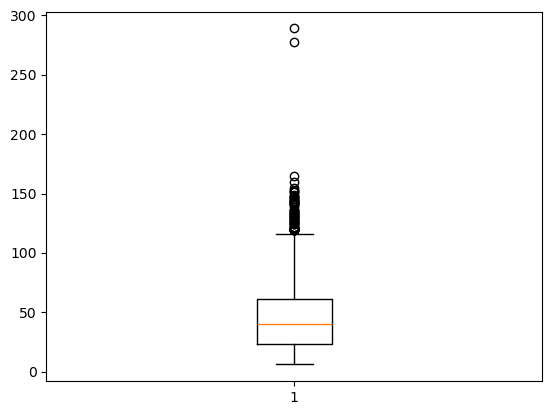

In [20]:
#Crée un diagramme en boîte pour visualiser la distribution et identifier les valeurs extrêmes du dioxyde de soufre total.
plt.boxplot(df["total sulfur dioxide"])
plt.show()


In [ ]:
#Calcule le 1er quartile (Q1), 3ème quartile (Q3) et l'écart interquartile (IQR)
Q1 = df["total sulfur dioxide"].quantile(0.25)
Q3 = df["total sulfur dioxide"].quantile(0.75)
IQR = Q3 - Q1
# Supprime les lignes où "total sulfur dioxide" est en dehors de l'intervalle [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
df = df[~((df["total sulfur dioxide"] < (Q1 - 1.5 * IQR)) | (df["total sulfur dioxide"] > (Q3 + 1.5 * IQR)))]

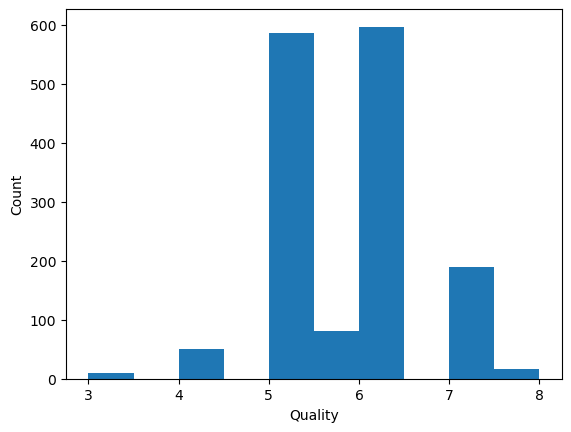

In [22]:
#  Crée un histogramme pour visualiser la répartition des notes de qualité du vin.
plt.hist(df["quality"])
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

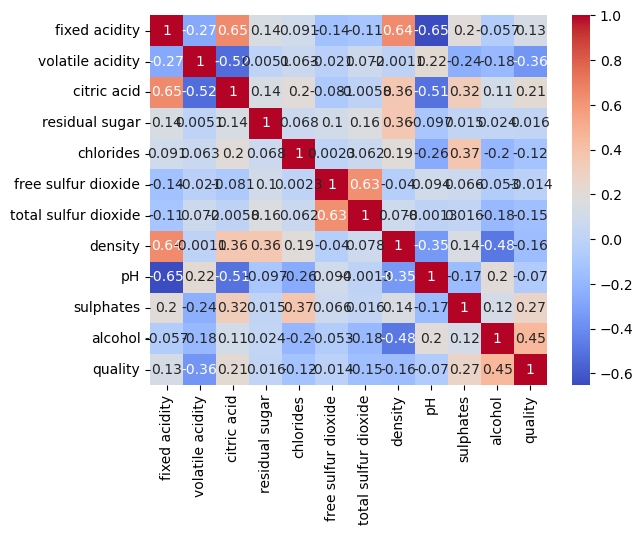

In [ ]:
# Calcule la corrélation entre toutes les variables
corr = df.corr()
# Affiche une heatmap (carte de chaleur) avec les valeurs de corrélation annotées
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

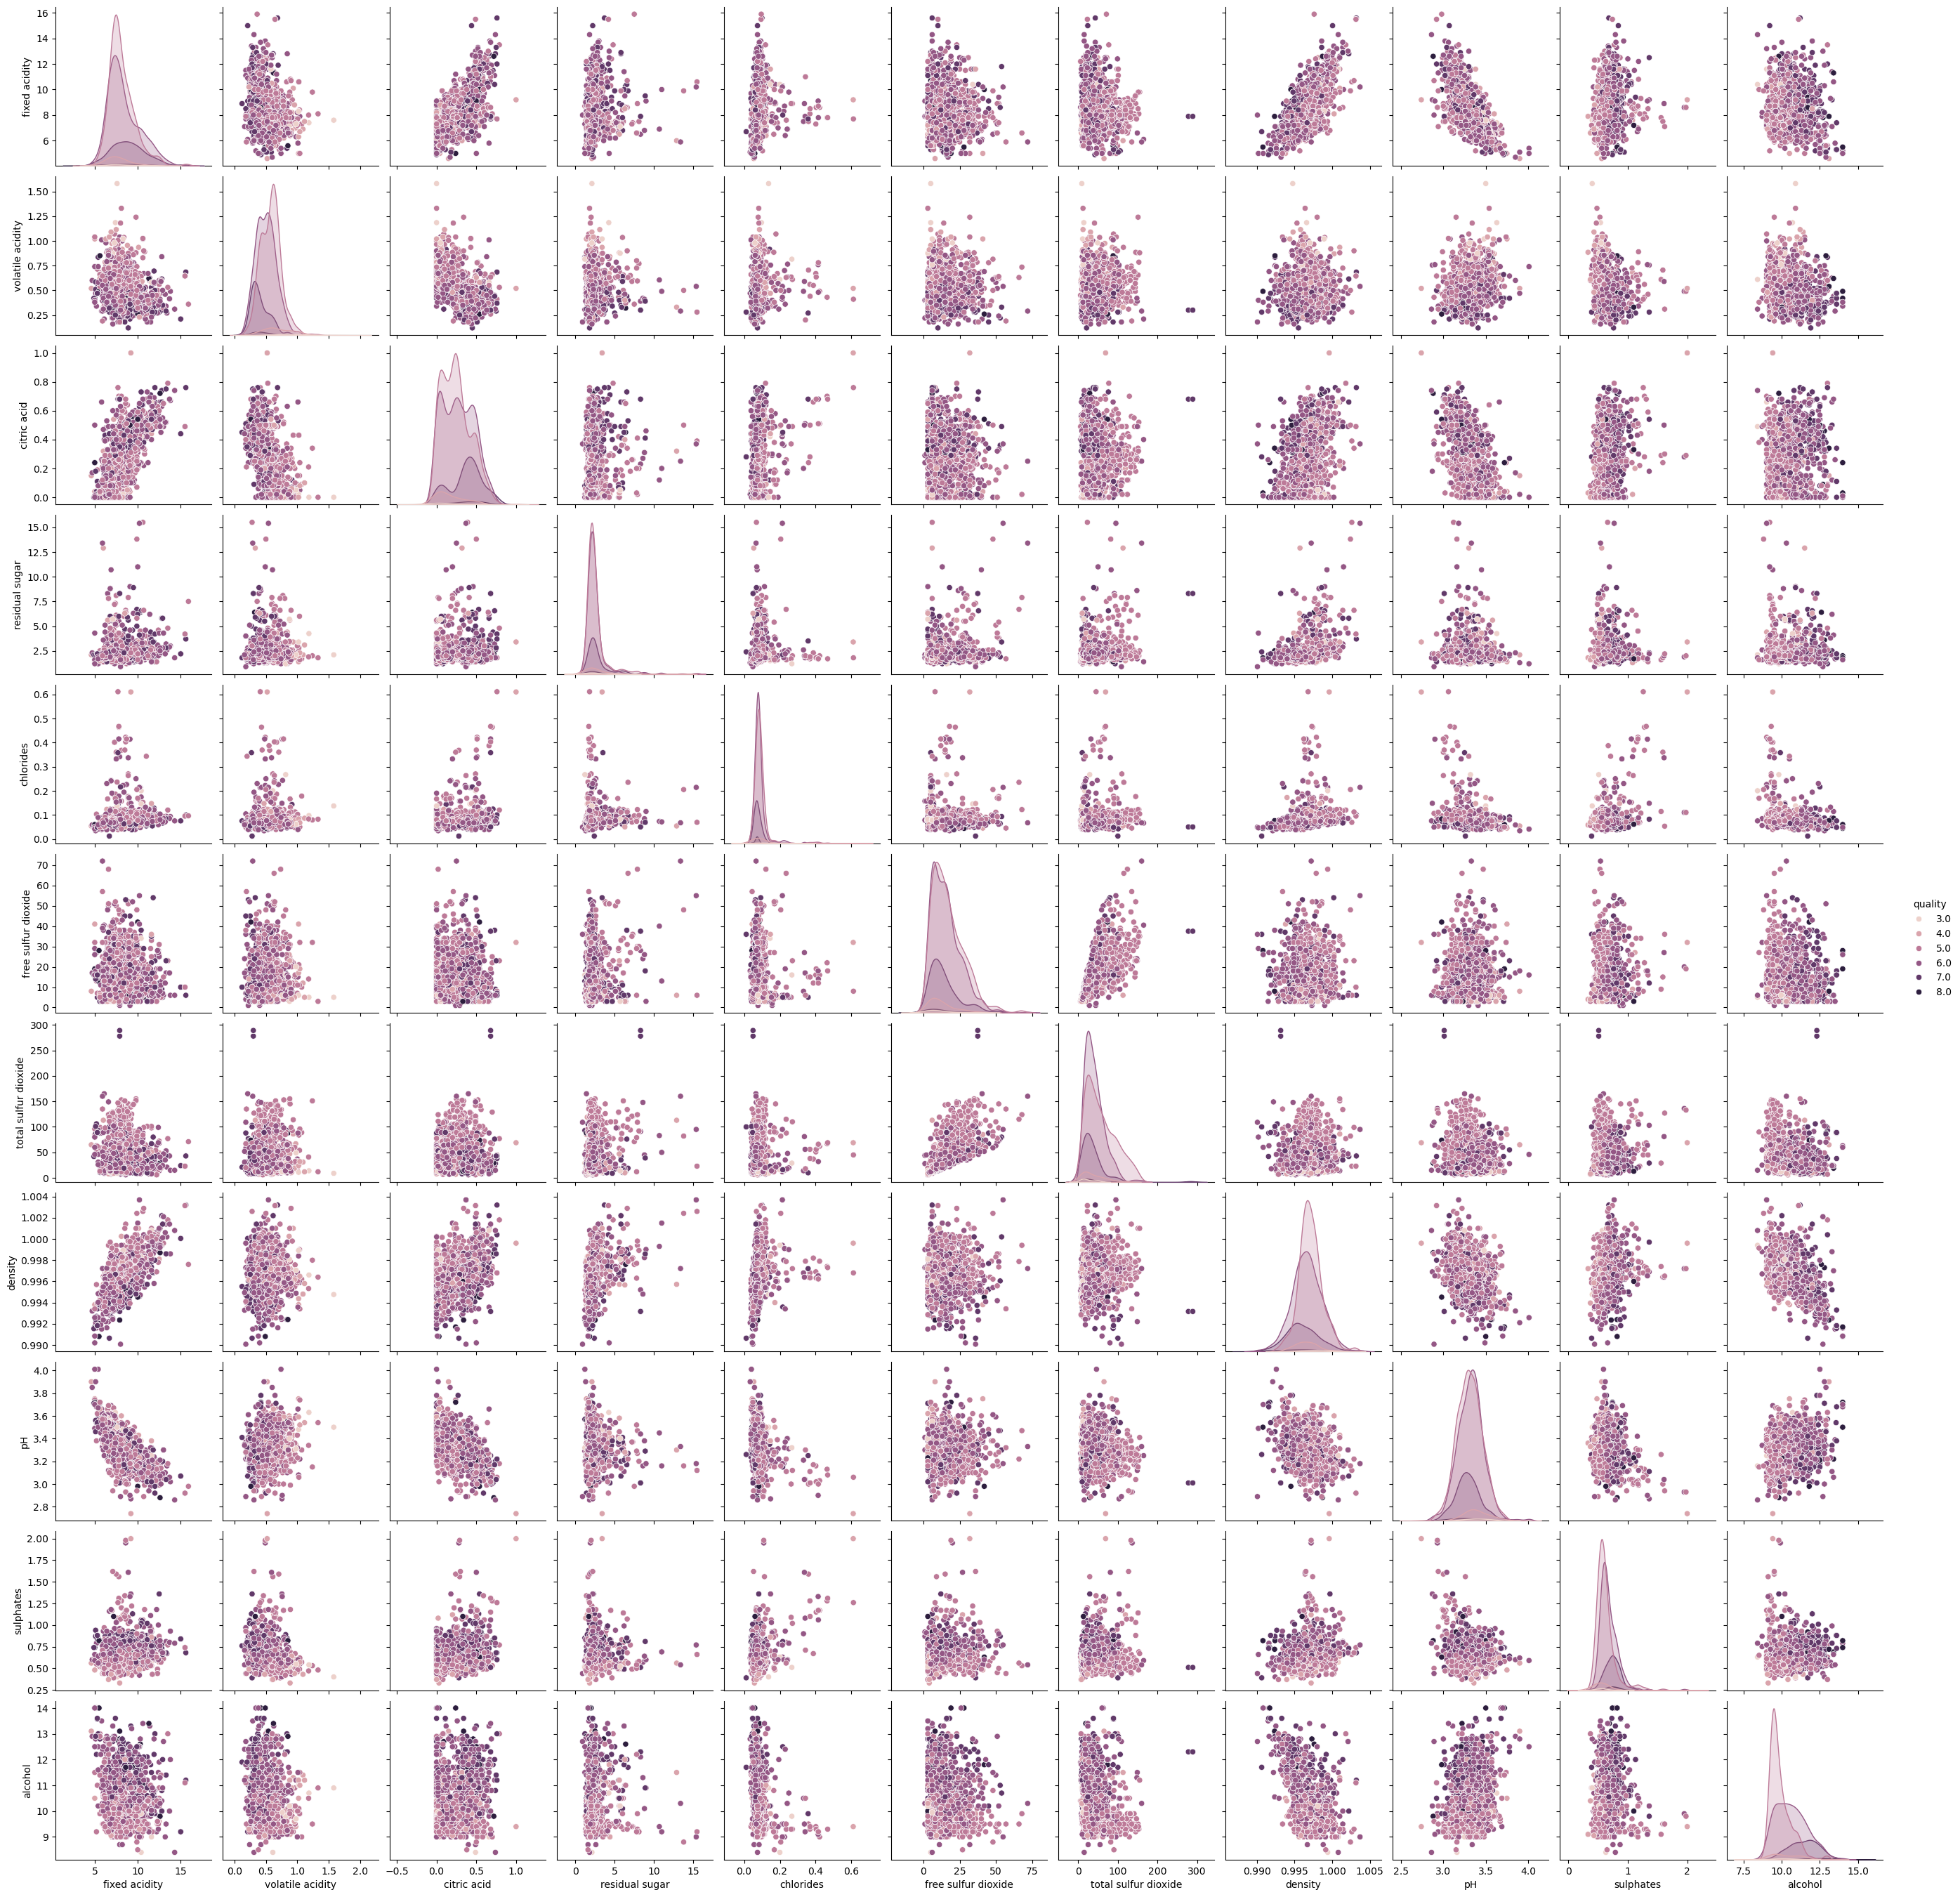

In [27]:
# Permet de visualiser les distributions et relations multivariées. Utile pour détecter des patterns, clusters ou séparations entre les classes de qualité
sns.pairplot(data=df, vars=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"], hue="quality")